In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
data = datasets.load_iris()

In [3]:
# print(data.DESCR)

In [4]:
type(data.data)

numpy.ndarray

In [5]:
type(data.target)

numpy.ndarray

In [6]:
data.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [7]:
data.target.reshape(150, 1)[:5]

array([[0],
       [0],
       [0],
       [0],
       [0]])

In [8]:
print(type(data.feature_names))
data.feature_names

<class 'list'>


['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

----------------
**This is not nessesary for modeling, but usefull for EDA and VIS and make easier preprocessing**

In [9]:
def create_df(in_data):
    raw_labels = [items for items in data.feature_names]
    raw_labels.append('target')
    print(raw_labels)

    raw_data = np.concatenate([in_data.data, in_data.target.reshape(150, 1)], axis=1)

    return pd.DataFrame(raw_data, columns=raw_labels)
    


In [10]:
df = create_df(data)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'target']


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [11]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [40]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [12]:
df.target.value_counts()

target
0.0    50
1.0    50
2.0    50
Name: count, dtype: int64

In [30]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [27]:
sns.color_palette('tab10')

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

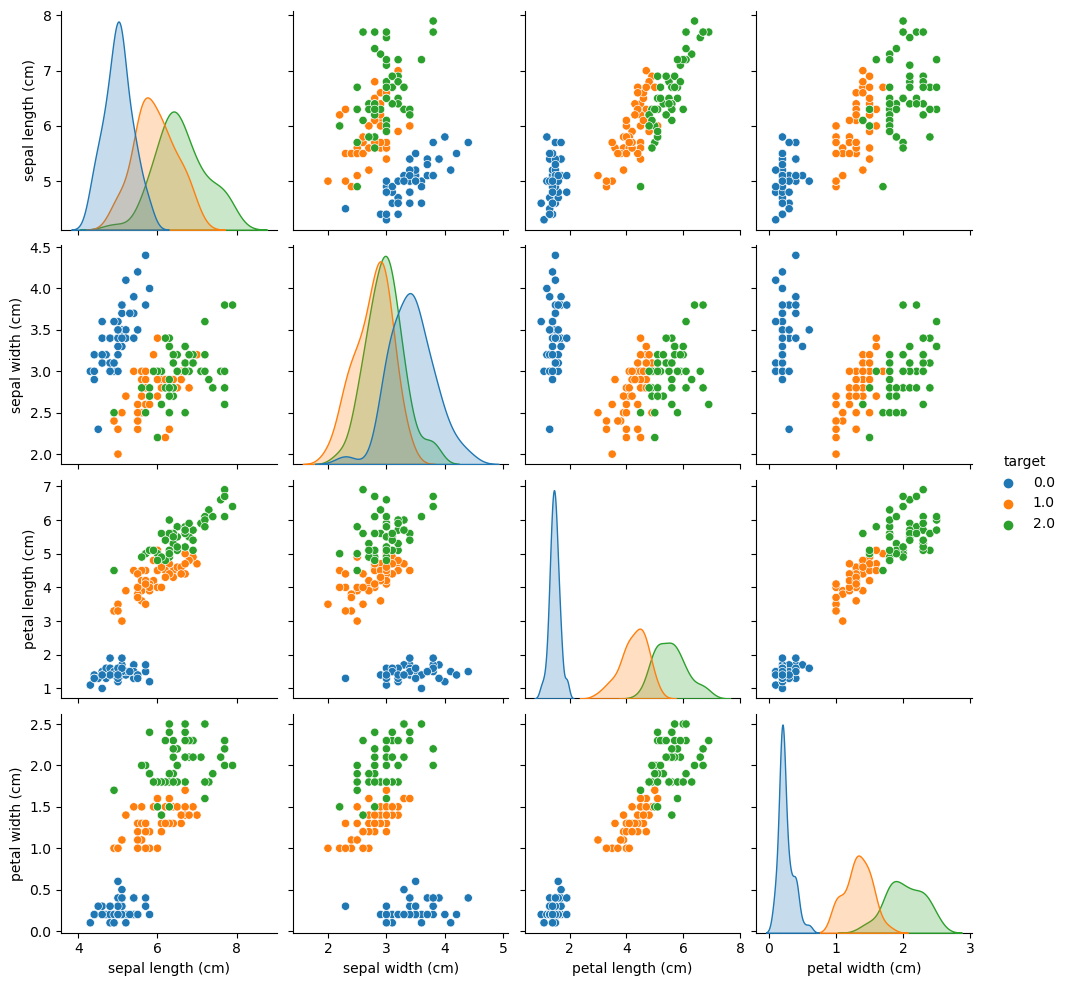

In [39]:
sns.pairplot(df, hue='target', palette='tab10')

## Preprocess

In [102]:
from sklearn.model_selection import train_test_split

In [103]:
# Scaling

In [115]:
X = df.drop(columns='target')
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

## Decision Tree Classifier
**Cons:**

* Not good for High dim problems
* may fall in Overfit, because must contine to reach gini=0 (or leaf node)

## Model

In [116]:
# from sklearn.tree import  DecisionTreeClassifier
from sklearn import  tree


In [117]:
model = tree.DecisionTreeClassifier()

**Intentionally train model by whole data to represent tree**

In [118]:
model.fit(X, y)

DecisionTreeClassifier()

In [119]:
# Sample Predictions to trace the tree
model.predict([
    [6.1, 2.4, 1.8, 2.0],
    [7.1, 2.4, 2.8, 2.5]
])

array([0., 2.])

## Plot Tree

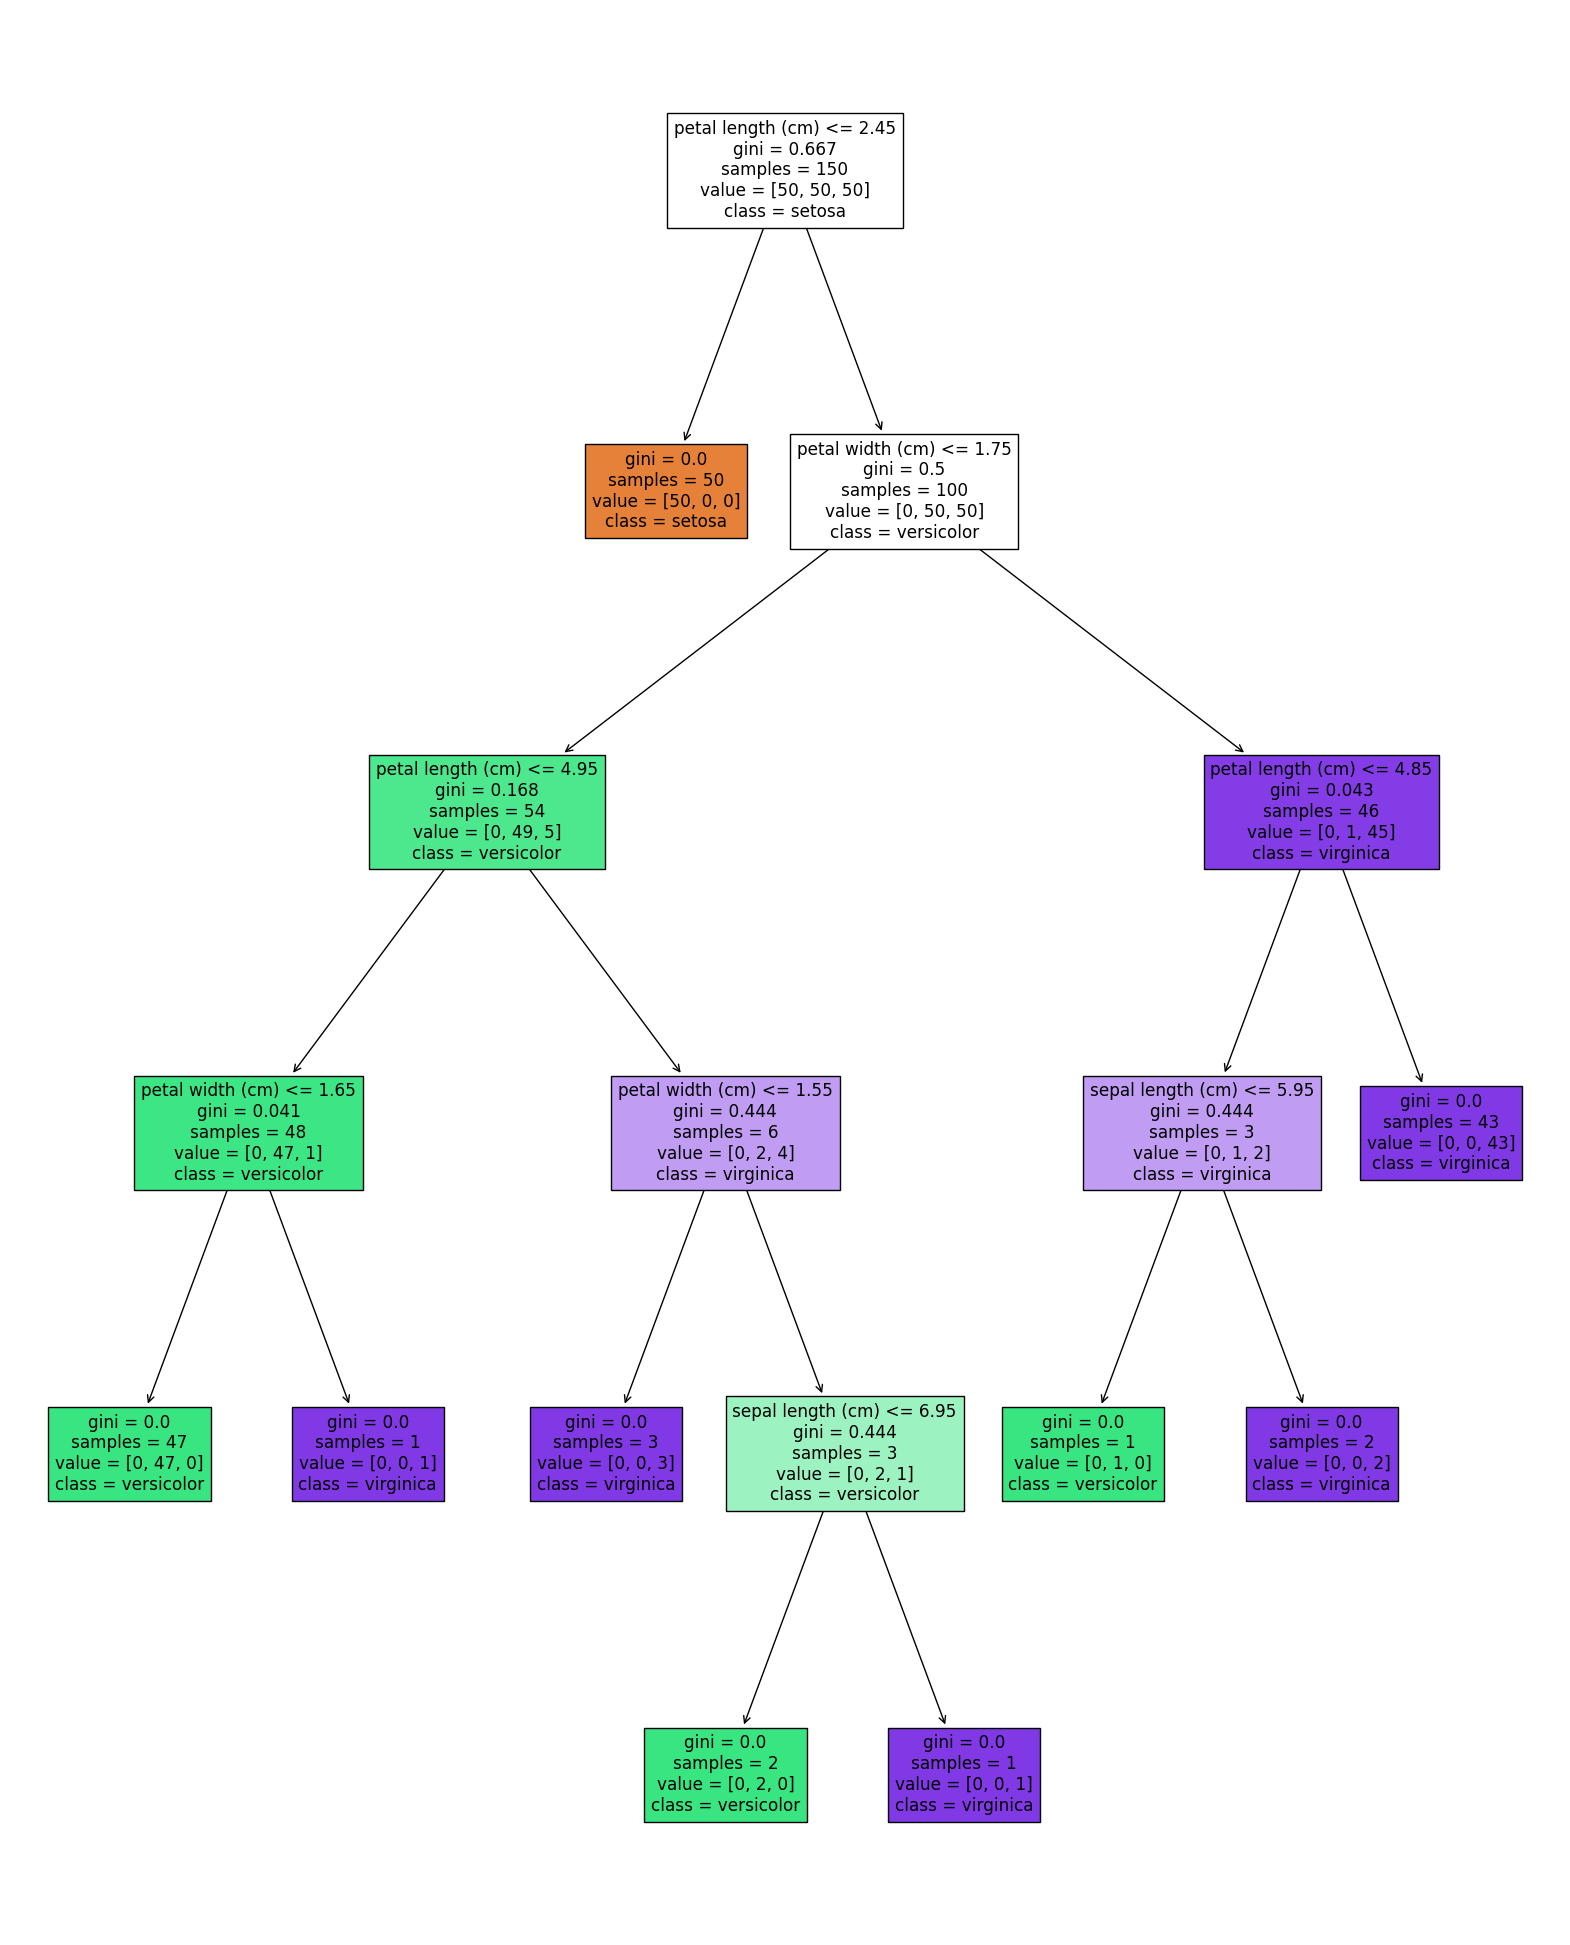

In [120]:
fig = plt.figure(figsize=(20,25))
_ = tree.plot_tree(model, feature_names=data.feature_names, class_names=data.target_names, filled=True)

**Now train model with splited training data**

In [136]:
model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)


DecisionTreeClassifier()

In [137]:
predict = model.predict(X_test)
# expected = y_test

In [138]:
from sklearn.metrics import classification_report, confusion_matrix

In [139]:
print(classification_report(predict, y_test))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        15
         1.0       0.95      0.95      0.95        22
         2.0       0.92      0.92      0.92        13

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



In [140]:
print(confusion_matrix(predict, y_test))

[[15  0  0]
 [ 0 21  1]
 [ 0  1 12]]


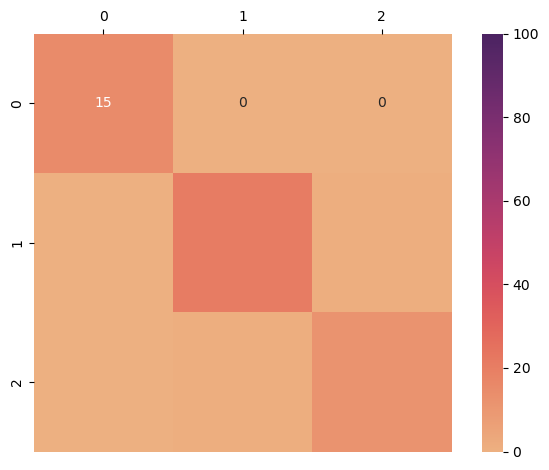

In [141]:
ax = sns.heatmap(confusion_matrix(predict, y_test), square=True, fmt='d' ,annot=True, cmap='flare', vmax=100)
ax.xaxis.tick_top()
plt.tight_layout()